In [32]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [27]:
df = pd.read_hdf('../data/output/cleaned_data.h5', key='v1')

In [28]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_rest
0,2006/12/16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.3
1,2006/12/16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.3
2,2006/12/16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.6
3,2006/12/16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.8
4,2006/12/16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.1


I put the data having missing value into test set, and put the rest into training set.

In [29]:
test_df = df.loc[df.Sub_metering_rest.isna()]
train_df = df.loc[df.Sub_metering_rest.isna() == False]

I make sure that there is no `NaN` value in training set

In [30]:
train_df.isnull().values.any()

False

I present the distribution of the test set.

In [96]:
missing, counts = np.unique(test_df.Date, return_counts=True)

<BarContainer object of 82 artists>

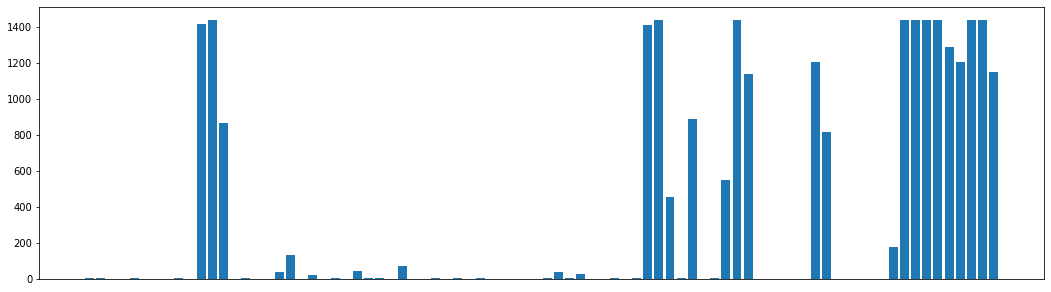

In [98]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.get_xaxis().set_visible(False)
plt.bar(missing, counts)

In [100]:
missing_day = [missing[i] for i in range(len(counts)) if counts[i] > 1000]
missing_day

['2007/4/28',
 '2007/4/29',
 '2009/6/13',
 '2009/6/14',
 '2010/1/13',
 '2010/1/14',
 '2010/3/20',
 '2010/8/18',
 '2010/8/19',
 '2010/8/20',
 '2010/8/21',
 '2010/8/22',
 '2010/9/25',
 '2010/9/26',
 '2010/9/27',
 '2010/9/28']

# Task1: Recover the missing value

In this part, I will create a Machine Learning model to recover the missing value by prediction.